In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Reads the csv file into a dataframe
df = pd.read_csv("imdb_top_1000.csv")

# Changes the datatype of the 'Gross' column to an int
df["Gross"] = df["Gross"].dropna().str.replace("[,]", "").astype(int)

# Shows the first 10 rows of the dataframe
df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0


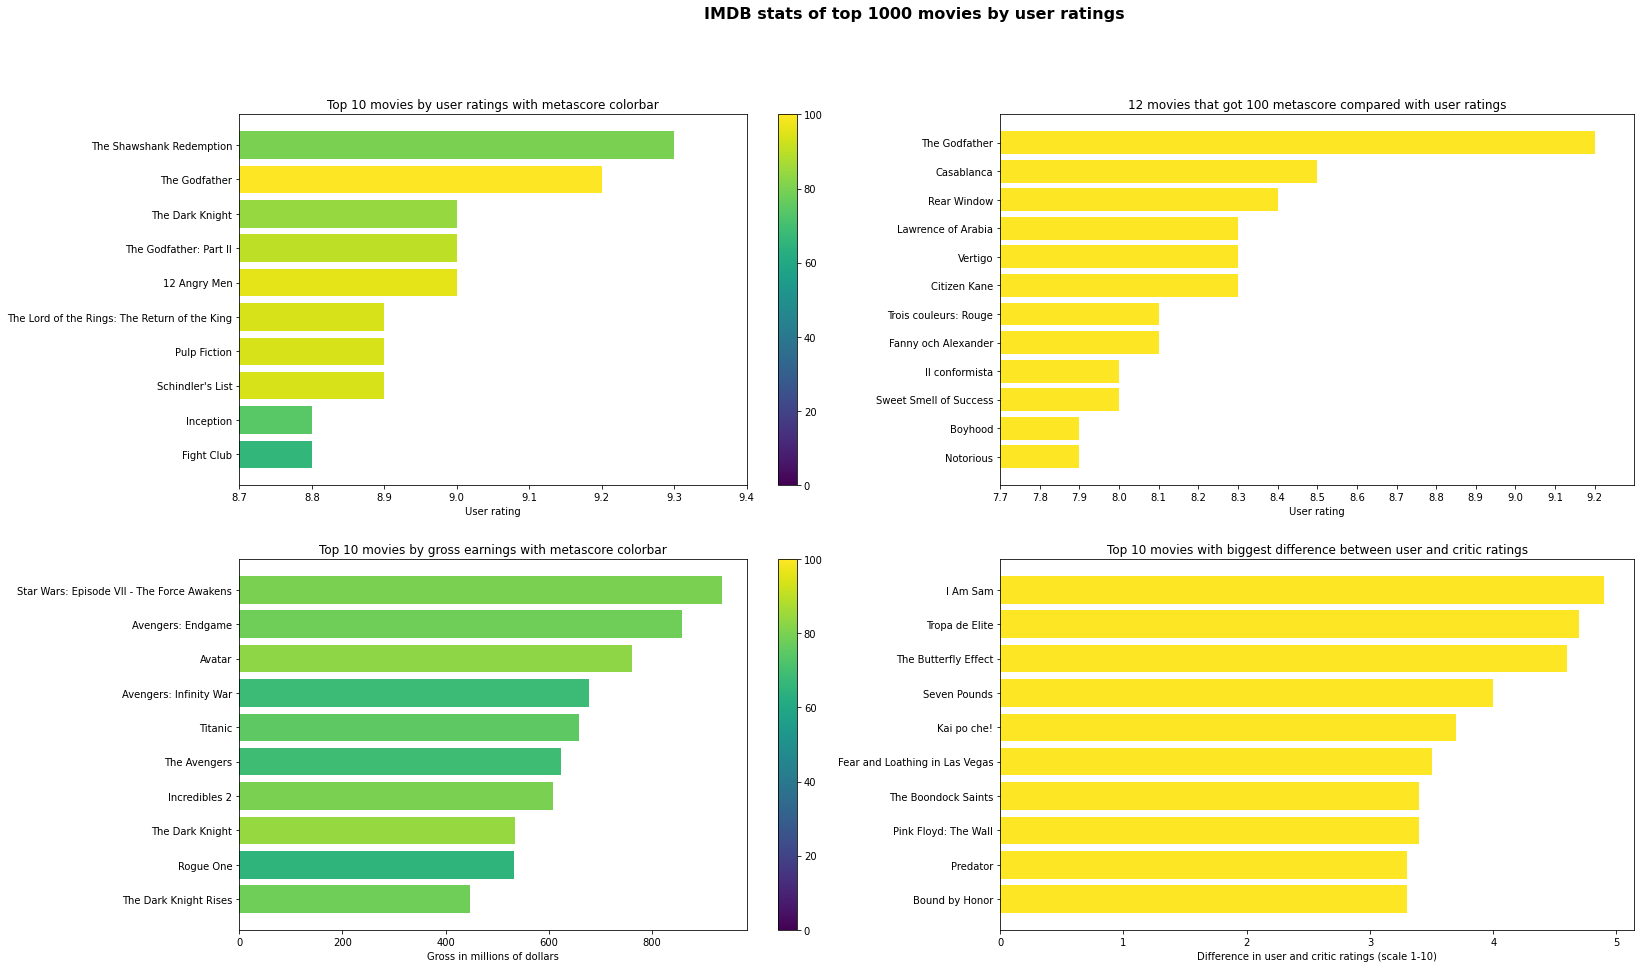

In [15]:
# Sets up the figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(25, 15))
fig.suptitle("IMDB stats of top 1000 movies by user ratings", fontsize=16, fontweight="bold")

# Colormap
cmap = cm.get_cmap("viridis")
rating_norm = Normalize(vmin=0, vmax=10)
meta_norm = Normalize(vmin=0, vmax=100)

# ax1
top10_title = df["Series_Title"][:10]
top10_rating = df["IMDB_Rating"][:10]
top10_indexes = list(range(1, 11))
ax1.barh(top10_title, top10_rating, color = cmap(meta_norm(df["Meta_score"])))
ax1.set(xlim = (8.7, 9.4))
ax1.invert_yaxis()
ax1.set(title="Top 10 movies by user ratings with metascore colorbar",
        xlabel="User rating")

# ax2
meta100 = df[df["Meta_score"]==100]
meta100_title = meta100["Series_Title"]
meta100_rating = meta100["IMDB_Rating"]
ax2.barh(meta100_title, meta100_rating, color = "#fde725")
ax2.set(xlim = (7.7, 9.3), xticks = [i * 0.1 for i in range(77, 93, 1)])
ax2.invert_yaxis()
ax2.set(title="12 movies that got 100 metascore compared with user ratings",
        xlabel="User rating")

# ax3
gross10 = df.sort_values("Gross", ascending = False)[:10]
gross10_title = gross10["Series_Title"]
gross10_gross = gross10["Gross"]/1000000
ax3.barh(gross10_title, gross10_gross, color = cmap(meta_norm(gross10["Meta_score"])))
ax3.invert_yaxis()
ax3.set(title="Top 10 movies by gross earnings with metascore colorbar",
        xlabel="Gross in millions of dollars")

# ax4
df["Controversy"] = abs(df["Meta_score"]*0.1 - df["IMDB_Rating"])
contr10 = df.sort_values("Controversy", ascending=False)[:10]
contr10_title = contr10["Series_Title"]
contr10_contr = contr10["Controversy"]
ax4.barh(contr10_title, contr10_contr, color = "#fde725")
ax4.invert_yaxis()
ax4.set(title="Top 10 movies with biggest difference between user and critic ratings",
        xlabel="Difference in user and critic ratings (scale 1-10)")

# Colorbars
fig.colorbar(cm.ScalarMappable(norm=meta_norm, cmap=cmap), ax = ax1, cmap = cmap)
fig.colorbar(cm.ScalarMappable(norm=meta_norm, cmap=cmap), ax = ax3, cmap = cmap);


In [16]:
# Sets up the figure
df = df.sort_values("Released_Year")[:-1]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,
                                        ncols=1,
                                        figsize=(25, 25))

# ax1
ax1.scatter(df["Released_Year"], df["IMDB_Rating"], c=df["Meta_score"])
ax1.set(title="Rating of every movie with year of release and metascore colorbar",
        xlabel="Year of release",
        ylabel="User rating")
fig.colorbar(cm.ScalarMappable(norm=meta_norm, cmap=cmap), ax = ax1, cmap = cmap)

# Max user ratings and gross of a film in each year
max_ratings = df.groupby("Released_Year")["IMDB_Rating"].max()
max_gross = df.groupby("Released_Year")["Gross"].max()/1000000

# ax2
ax2.plot(df["Released_Year"].unique(), max_ratings, color = "#440154")
ax2.set(title="Graph of change in the best user ratings of a movie in each year",
        xlabel="Year of release",
        ylabel="User rating")

# ax3
ax3.plot(df["Released_Year"].unique(), max_gross, color = "#440154")
ax3.set(title="Graph of change in the highest gross of a movie in each year",
        xlabel="Year of release",
        ylabel="Gross in millions of dollars")

# Vertically rotates the values of year release
ax1.set_xticklabels(df["Released_Year"].unique(), rotation = "vertical")
ax2.set_xticklabels(df["Released_Year"].unique(), rotation = "vertical")
ax3.set_xticklabels(df["Released_Year"].unique(), rotation = "vertical");


SyntaxError: invalid syntax (4237939438.py, line 25)